# **Analyzing Student Stress Factors for Improved Mental Health Support**


![image](https://img.freepik.com/premium-photo/student-stress-concept-illustration-jpg_1072857-4797.jpg)

## **Purpose and Outcome:**
* **Purpose:** To identify key factors contributing to student stress and develop actionable strategies for improving mental health support in academic institutions.
* **Outcome:** Create a model that predicts stress levels, helping schools and mental health professionals understand the main reasons students feel stressed. This can guide changes or provide support where it is needed most.

## **Understand the dataset**
* **Number of Observations (Rows)**: 1,100.
* **Number of Features (Columns)**: 20, grouped into five categories:  Psychological, Physiological, Social, Environmental, and Academic Factors.
* **Psychological Factors** → 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression'
* **Physiological Factors** → 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem’
* **Environmental Factors** → 'noise_level', 'living_conditions', 'safety', 'basic_needs',
* **Academic Factors** → 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'
* **Social Factor** → 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

## **Scale explaining**
**‘anxiety_level' (0-21): Generalized Anxiety Disorder Scale (GAD-7)**
* 0–4: Minimal anxiety
* 5–9: Mild anxiety
* 10–14: Moderate anxiety
* 15–21: Severe anxiety
‘’self_esteem' (0-30): Rosenberg Self-Esteem Scale
* 0–14: Low self-esteem
* 15–24: Moderate self-esteem
* 25–30: High self-esteem

**’depression' (0-27): Patient Health Questionnaire (PHQ-9)**

* 0–4: Minimal depression
* 5–9: Mild depression
* 10–14: Moderate depression
* 15–19: Moderately severe depression
* 20–27: Severe depression

**mental_health_history' (0/1):** Yes/No

**‘blood_pressure' (1-3):**
* 1: Normal blood pressure
* 2: Elevated blood pressure (pre-hypertension)
* 3: High blood pressure (hypertension)

**The remaining columns (0-5): can be changed depends on which factors**
* 0: Very Poor
* 1: Poor
* 2: Below Average
* 3: Average
* 4: Good
* 5: Very Good


## **Step 1: Data Download**

Download the dataset from Kaggle using `opendatasets`. This dataset will be used to analyze the stress factors and predict stress levels.

In [ ]:
!pip install opendatasets

**Get the Kaggle API Key to download dataset on Kaggle:**

* Go to Your Kaggle Account Settings:

* On the page shown in the image, click on your profile icon in the top right corner.
*From the dropdown menu, select "Settings".
Scroll Down to the API Section

* In the API section, you’ll find an option to Create New API Token.
* Download kaggle.json:
* After clicking "Create New API Token", a file named kaggle.json will be downloaded to your computer.
* Open kaggle.json for your information and type in username and key.

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=facebook&fbclid=IwY2xjawIbRtpleHRuA2FlbQIxMQABHRdRNGmQAKlzUZb-JqmCkOyh_hwJ-NBBiiMx_HEVgykntNr09IPuZSJXWQ_aem_L-4C_GcPU3m4ROoQy4Dd9Q")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islatan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis


100%|██████████| 11.7k/11.7k [00:00<00:00, 2.51MB/s]

## **Step 2: Import libraries and process data**
Import all libraries that are used in this project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


Let's take a quick look over 5 first rows of the dataset.

In [ ]:
df = pd.read_csv("/content/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv")
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


Let's take a quick look over dataset info.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

And clearly you can see that there are no null values, so handling missing values and ensuring the correct data types step can be passed.

Next, convert `stress_level` to a binary format to make classification easier.

In [ ]:
df['stress_level'] = df['stress_level'].map({0:0, 1:1, 2:1})

## **Step 3: Exploratory Data Analysis (EDA)**

Let's plot bar charts showing the total counts in each factor in order to see general distribution of the dataset.

<ipython-input-8-b1cfba889e56>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='mako')
<ipython-input-8-b1cfba889e56>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='mako')
<ipython-input-8-b1cfba889e56>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='mako')
<ipython-input-8-b1cfba889e56>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

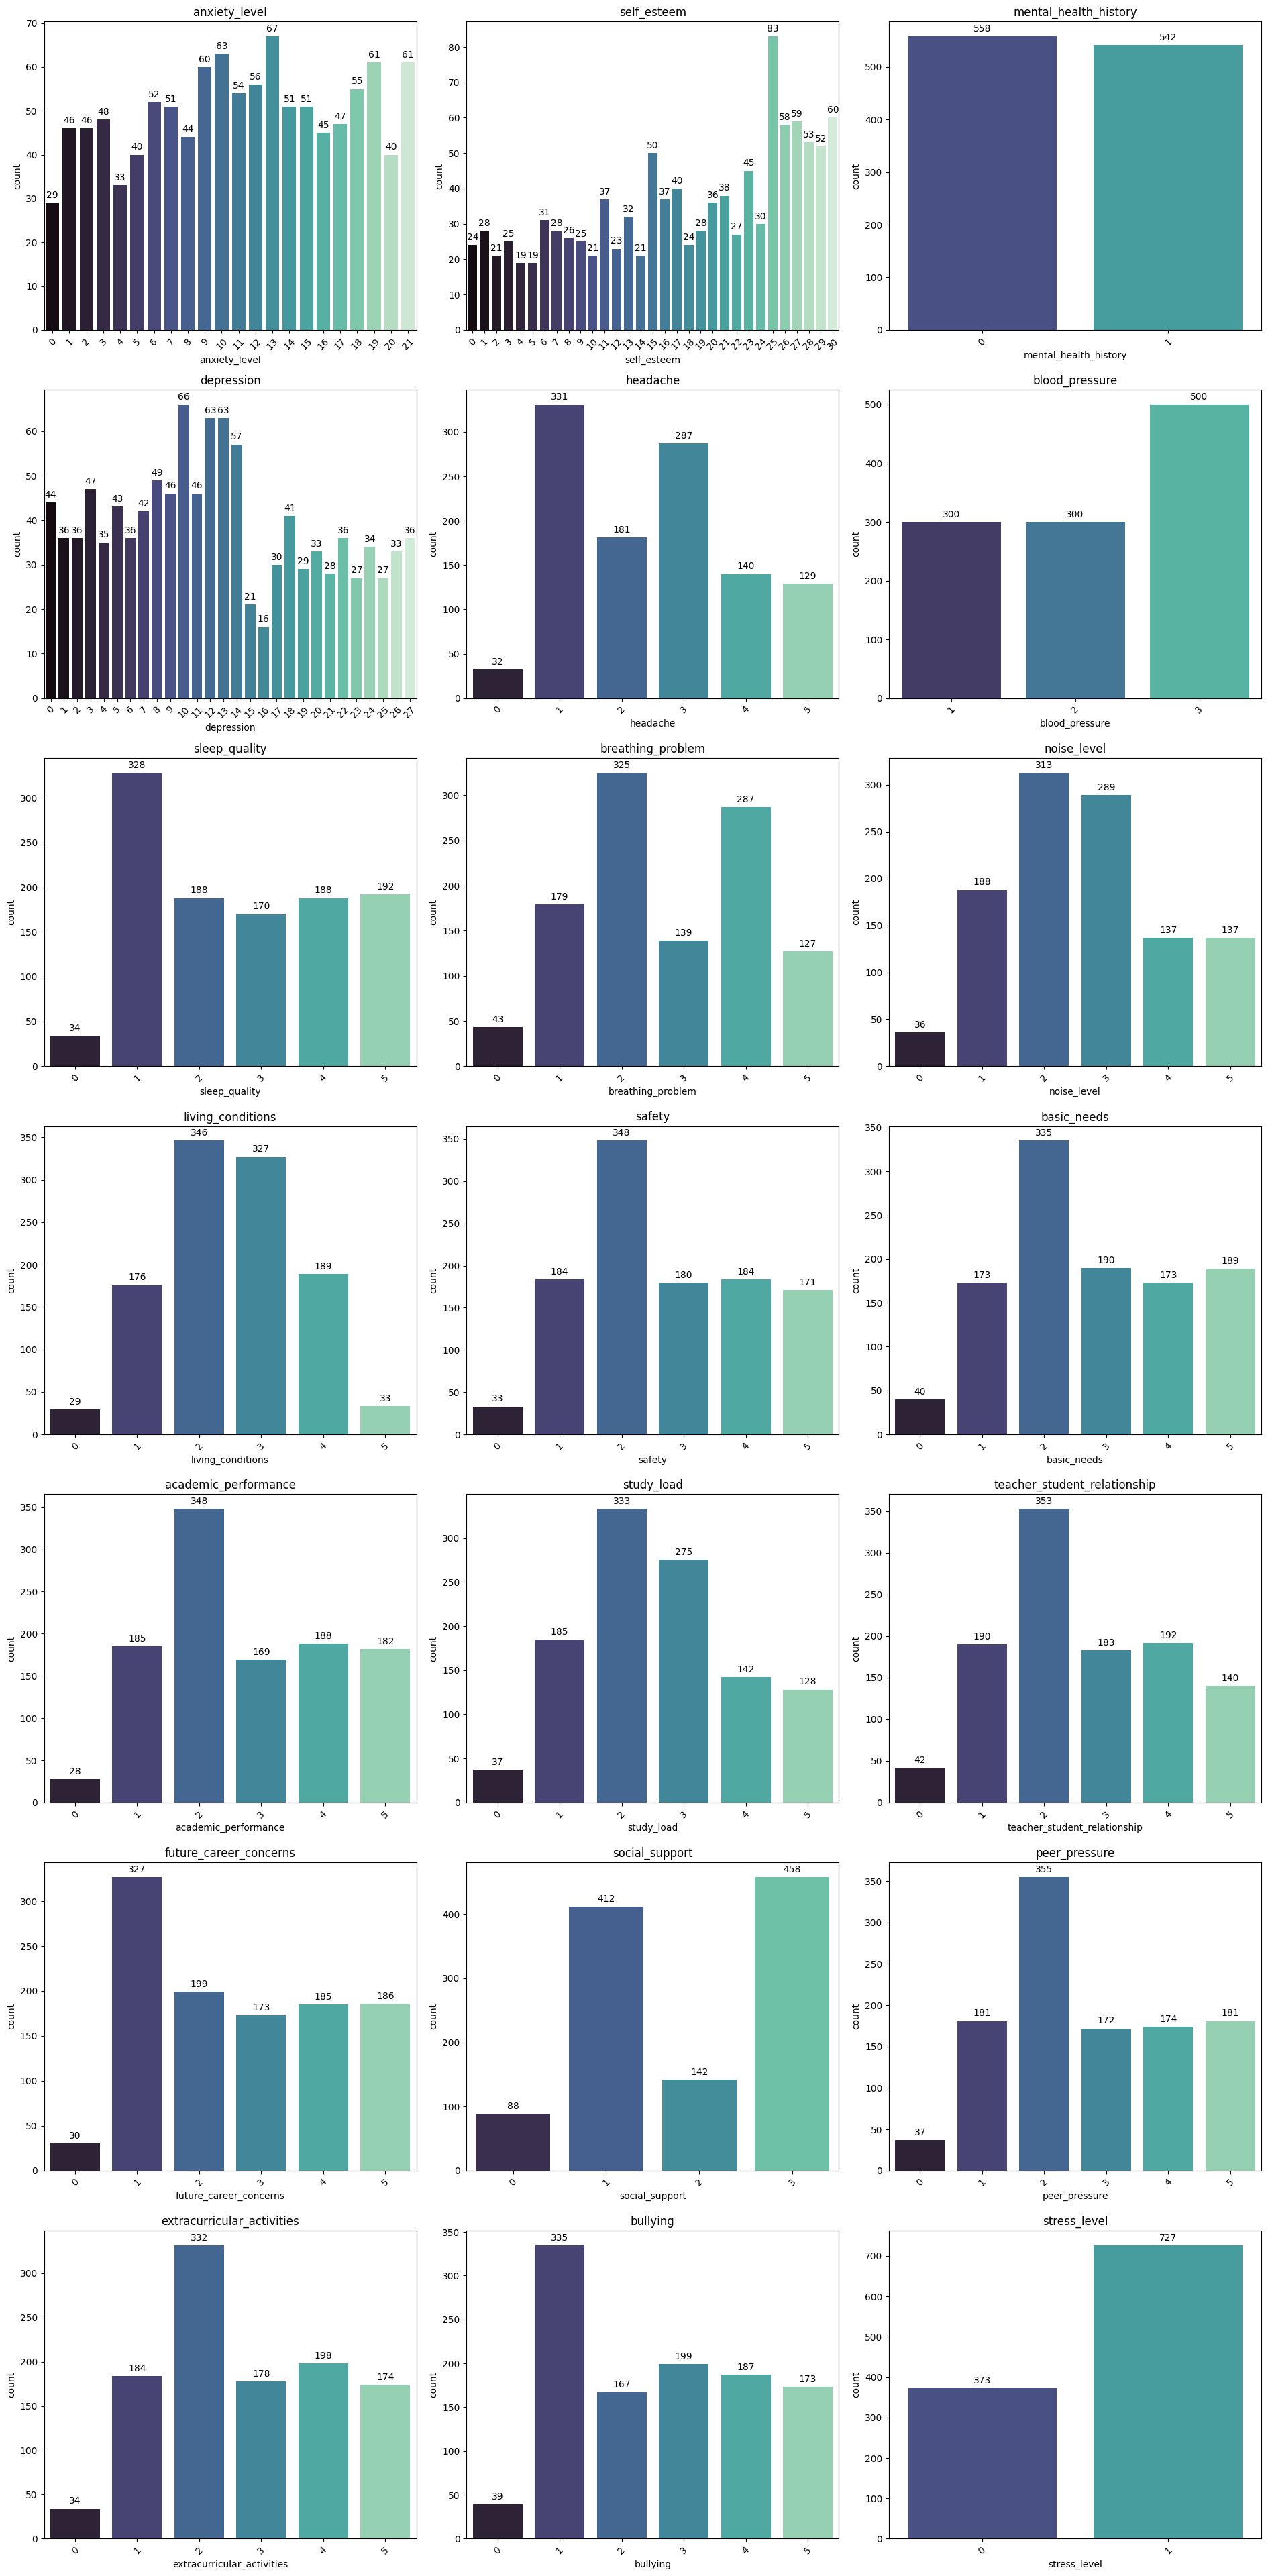

In [ ]:
import math

# Define number of columns (3 per row) and calculate rows dynamically
num_columns = 3
num_plots = len(df.columns)
num_rows = math.ceil(num_plots / num_columns)  # Calculate required rows

# Adjust figure size dynamically based on the number of rows
plt.figure(figsize=(19, num_rows * 5.5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, num_columns, i)  # Organize plots into grid layout (rows x 3 columns)
    ax = sns.countplot(x=column, data=df, palette='mako')

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',  # Convert count to integer
            (p.get_x() + p.get_width() / 2, p.get_height()),  # Position text at the top center of the bar
            ha='center',  # Horizontally align text at center
            va='bottom',  # Position text slightly above the bar
            fontsize=10,
            color='black',
            xytext=(0, 3),  # Offset to avoid overlap with the bar
            textcoords="offset points"
        )

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(column)  # Set title for each subplot

plt.tight_layout()  # Optimize layout to prevent overlap
plt.show()

### **Insights**

**Psychological Factors:**

*Anxiety Level:*

*   Most responses concentrated in moderate anxiety levels (10-14), which is ~27% of the total


*Self-Esteem:*


*   Most responses concentrated in high self-esteem levels (25-30), which is ~33% of the total.

*Mental Health History:*

*   Individuals with and without mental health history are nearly equally distributed (50/50)

*Depression:*

*   Most responses concentrated in moderate depression levels (10-14), which is ~27% of the total.

**Physiological Factors:**


*Headache:*


*   Many individuals experience headaches - they are mostly at level 1 and 3, which are very mild and modeate level respectively.


*Blood Pressure:*

*   Most students experience high blood pressure (level 2-3), which takes up ~73% of the total.

*Sleep Quality:*

*   Majority report poor sleep quality at level 1.


*Breathing Problem:*

*   Most have breathing problems, especially at mild level (level 2) and severe level (level 4)


**Environmental Factors:**

*Noise Level:*

*  Many report low to moderate levels of noise (level 2-3).

*Living Conditions:*

*  Most report below average to average living conditions (level 2-3), with few extremes.


*Safety:*

*  Most report fair safety level, especially at level 2.

*Basic Needs:*

*  Most report fair access to basic needs, especially at level 2.


**Academic Factors:**

*Academic Performance:*

*  Majority report below average academic performance (level 2).

*Study Load:*

*  Many report moderate study loads (level 2-3),

*Teacher-Student Relationship:*

*  Majority report fairly positive relationships (level 2).

*Future Career Concerns:*

*  Many are concerned about their careers, but just a light level (level 1).


**Social Factors:**

*Social Support:*

*  Majority report adequate social support - mostly in level 1 and 3.

*Peer Pressure:*

*  Many report fair peer pressure level (level 2).

*Extracurricular Activities:*

*  Many participate in extracurricular activities, but not overwhelmingly, mostly level 2.

*Bullying:*

*  Majority report a significant number experience bullying at level 1.




## **Step 4: Logistic Regression Model**

### **Chi-Square Test**:
Since all of the above variables are categorical, Pearson’s correlation cannot be used to measure the strength and direction of their linear relationship. In this case, Chi-square test is performed to see if they are significantly related to `stress_level` or not.

In [ ]:
# List of numeric categorical variables
categorical_columns = df.drop('stress_level', axis=1)
categorical_variables = categorical_columns.columns

# Store p-values for each variable
p_values = {}

# Loop through each numeric categorical variable and perform Chi-square test with stress_level
for var in categorical_variables:
    # Create a contingency table for each variable and the binary stress_level
    contingency_table = pd.crosstab(df[var], df['stress_level'])

    # Perform the Chi-square test of independence
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # Store the p-value
    p_values[var] = p_value

# Print the p-values for each variable
p_values


{'anxiety_level': 1.1938362077342143e-141,
 'self_esteem': 2.411923932968084e-133,
 'mental_health_history': 1.7536764103203237e-76,
 'depression': 1.089618001608702e-135,
 'headache': 2.9046832125102588e-167,
 'blood_pressure': 3.4964796648828596e-179,
 'sleep_quality': 8.299021953291136e-151,
 'breathing_problem': 1.551118764502076e-91,
 'noise_level': 1.1642815766321163e-104,
 'living_conditions': 9.220630012635033e-107,
 'safety': 5.2216565809793016e-164,
 'basic_needs': 3.119078598356659e-162,
 'academic_performance': 1.2865044180425957e-163,
 'study_load': 3.193137200822339e-98,
 'teacher_student_relationship': 3.223795854151013e-169,
 'future_career_concerns': 5.498593724561714e-170,
 'social_support': 1.086203098107412e-79,
 'peer_pressure': 4.949628553186511e-88,
 'extracurricular_activities': 1.1071653825402377e-93,
 'bullying': 1.185223781907082e-164}

**All factors are related to stress_level, all are significantly associated with stress levels. --> use all of them in logistic regression**

### **Build Logistic Regression Model**

In [ ]:
X = df.drop('stress_level', axis=1)
y = df['stress_level']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.142480
         Iterations 9


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           stress_level   No. Observations:                 1100
Model:                          Logit   Df Residuals:                     1079
Method:                           MLE   Df Model:                           20
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                  0.7775
Time:                        18:29:07   Log-Likelihood:                -156.73
converged:                       True   LL-Null:                       -704.47
Covariance Type:            nonrobust   LLR p-value:                1.629e-219
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           12.9234      2.019      6.402      0.000       8.967      16.880
anxiety_level                    0.0139      0.028      0.494      0.621      -0.041       0.069
self_esteem                     -0.0666      0.019     -3.445      0.001      -0.104      -0.029
mental_health_history           -0.5171      0.366     -1.412      0.158      -1.235       0.201
depression                       0.0289      0.022      1.330      0.184      -0.014       0.071
headache                         0.1933      0.105      1.839      0.066      -0.013       0.399
blood_pressure                  -3.9482      0.521     -7.574      0.000      -4.970      -2.927
sleep_quality                   -0.2087      0.097     -2.152      0.031      -0.399      -0.019
breathing_problem                0.0259      0.098      0.265      0.791      -0.166       0.218
noise_level                      0.2512      0.103      2.429      0.015       0.048       0.454
living_conditions                0.0146      0.110      0.132      0.895      -0.202       0.231
safety                          -0.2553      0.109     -2.340      0.019      -0.469      -0.041
basic_needs                     -0.2875      0.103     -2.789      0.005      -0.490      -0.085
academic_performance            -0.3053      0.104     -2.941      0.003      -0.509      -0.102
study_load                       0.3744      0.100      3.752      0.000       0.179       0.570
teacher_student_relationship     0.0012      0.131      0.009      0.993      -0.255       0.257
future_career_concerns           0.1867      0.103      1.809      0.070      -0.016       0.389
social_support                  -1.6269      0.313     -5.193      0.000      -2.241      -1.013
peer_pressure                    0.1532      0.104      1.479      0.139      -0.050       0.356
extracurricular_activities       0.1916      0.100      1.919      0.055      -0.004       0.387
bullying                         0.2129      0.105      2.030      0.042       0.007       0.418
================================================================================================
"""

### **Results:**
Pseudo R-squared: $0.7775$

>In this case, a value of 0.78 indicates a reasonably good fit.


LLR p-value: $1.629e-129$

>The p-value is extremely low, indicating that the model can significantly predict the target variable (stress_level).

### ** Step 5: Model Training and Evaluation**

Now to simulate prediction on data, we will again divide our data into training and testing data using `train_test_split`.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The regression is rebuilt using X_train and y_train data.

In [ ]:
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.138769
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           stress_level   No. Observations:                  880
Model:                          Logit   Df Residuals:                      859
Method:                           MLE   Df Model:                           20
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                  0.7840
Time:                        18:29:07   Log-Likelihood:                -122.12
converged:                       True   LL-Null:                       -565.30
Covariance Type:            nonrobust   LLR p-value:                6.276e-175
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           14.5108      2.380      6.096      0.000       9.846      19.176
anxiety_level                    0.0323      0.033      0.977      0.329      -0.033       0.097
self_esteem                     -0.0811      0.023     -3.525      0.000      -0.126      -0.036
mental_health_history           -0.5926      0.435     -1.362      0.173      -1.446       0.260
depression                       0.0279      0.025      1.135      0.256      -0.020       0.076
headache                         0.0496      0.123      0.403      0.687      -0.192       0.291
blood_pressure                  -4.1435      0.632     -6.553      0.000      -5.383      -2.904
sleep_quality                   -0.2140      0.110     -1.947      0.051      -0.429       0.001
breathing_problem                0.0165      0.113      0.146      0.884      -0.205       0.238
noise_level                      0.3858      0.121      3.192      0.001       0.149       0.623
living_conditions               -0.0284      0.120     -0.237      0.813      -0.264       0.207
safety                          -0.2766      0.126     -2.188      0.029      -0.524      -0.029
basic_needs                     -0.2940      0.118     -2.489      0.013      -0.525      -0.063
academic_performance            -0.3152      0.121     -2.600      0.009      -0.553      -0.078
study_load                       0.3134      0.111      2.820      0.005       0.096       0.531
teacher_student_relationship    -0.1464      0.148     -0.992      0.321      -0.436       0.143
future_career_concerns           0.2312      0.119      1.938      0.053      -0.003       0.465
social_support                  -1.5743      0.357     -4.412      0.000      -2.274      -0.875
peer_pressure                    0.0620      0.121      0.510      0.610      -0.176       0.300
extracurricular_activities       0.1697      0.117      1.445      0.148      -0.060       0.400
bullying                         0.1276      0.120      1.068      0.286      -0.107       0.362
================================================================================================
"""

The prediction will be performed based on a probability, which threshold = $0.5$
* if  $\text{prediction} > 0.5$ , student is likely to have stress.
* if  $\text{prediction} \leq 0.5$ , student is likely to be stress-free.

### **Classification Report**

In [ ]:
#probability
predictions = model.predict(X_test)
threshold = 0.5
y_pred = np.where(predictions > threshold, 1, 0)
# generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        72
           1       0.96      0.94      0.95       148

    accuracy                           0.93       220
   macro avg       0.92      0.93      0.92       220
weighted avg       0.93      0.93      0.93       220





Accuracy: $0.93$

> The model has a high accuracy (93%), which suggests that it correctly classifies a large proportion of instances.

Precision, Recall, and F1-Score:

Class 0 (No Stress):

> Precision $(0.88)$: The model correctly identifies 88% of the low stress cases.

>Recall $(0.92)$: The model correctly identifies 92% of actual low stress cases.

> F1-Score $(0.90)$: A balanced measure that combines precision and recall, showing good performance for class 0.

Class 1 (Stress):

> Precision $(0.96)$: The model has a high precision in identifying high stress cases (96%).

> Recall $(0.94)$: The model identifies 94% of the actual high stress cases.

> F1-Score $(0.95)$: This is a very good score, showing that the model does an excellent job identifying high stress instances.

Macro avg:
* Over $0.90$ for precision and recall, indicating a good overall performance across both classes.

Weighted avg:
* Over $0.90$ for both precision and recall, showing that the model is balanced in its performance on both classes, with a slight bias towards class 1.

### **Confusion Matrix:**

In [ ]:
cm = confusion_matrix(y_test, y_pred)

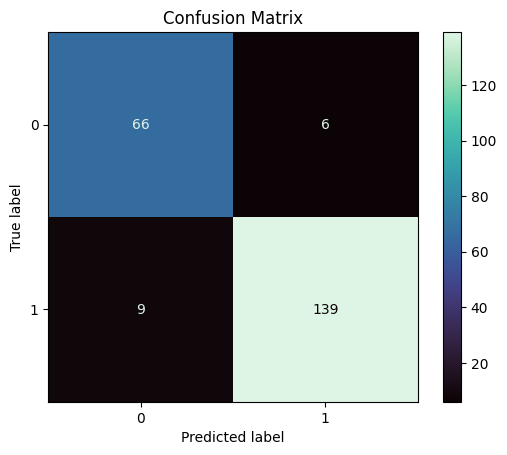

In [ ]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='mako')
plt.title('Confusion Matrix')
plt.show()



* True positives $(139)$: Stress instances correctly predicted as stress.
* False positives $(6)$: No-stress instances incorrectly predicted as stress.
* True negatives $(66)$: No-stress instances correctly predicted as no-stress.
* False negatives $(9)$: Stress instances incorrectly predicted as no-stress.

>This suggests that the model is better at identifying stress cases but has some room for improvement in distinguishing no-stress cases (as seen in the false positives).

### **Feature Importance:**

<ipython-input-22-a4211f55eaa0>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_coefficients = coefficients_without_const[sorted_indices]


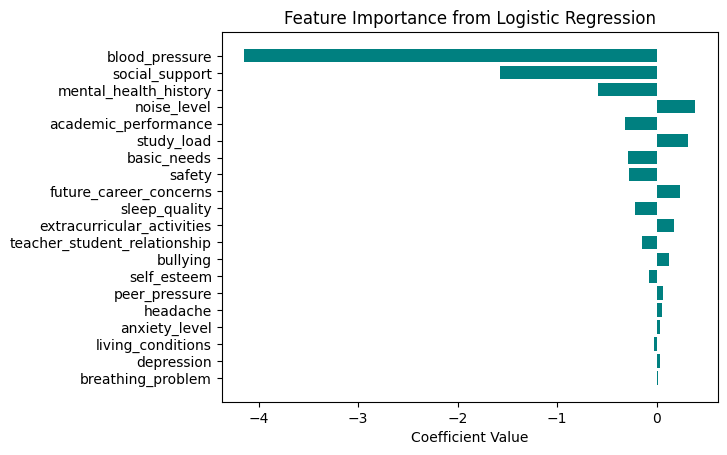

Sorted Coefficients: breathing_problem               0.016519
depression                      0.027906
living_conditions              -0.028436
anxiety_level                   0.032343
headache                        0.049582
peer_pressure                   0.061984
self_esteem                    -0.081118
bullying                        0.127627
teacher_student_relationship   -0.146395
extracurricular_activities      0.169687
sleep_quality                  -0.213959
future_career_concerns          0.231232
safety                         -0.276553
basic_needs                    -0.294002
study_load                      0.313390
academic_performance           -0.315190
noise_level                     0.385785
mental_health_history          -0.592588
social_support                 -1.574349
blood_pressure                 -4.143493
dtype: float64


In [ ]:
 # Get the coefficients (log-odds) of the features
coefficients = model.params

# Exclude the constant term (usually 'const')
coefficients_without_const = coefficients[coefficients.index != 'const']

# Now you can sort the coefficients to get feature importance
sorted_indices = np.argsort(np.abs(coefficients_without_const))[::1]
sorted_coefficients = coefficients_without_const[sorted_indices]
sorted_features = coefficients_without_const.index[sorted_indices]

# Plotting feature importance
plt.barh(sorted_features, sorted_coefficients, color='teal')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression')
plt.show()

# Print sorted coefficients
print(f'Sorted Coefficients: {sorted_coefficients}')


*Most Important Features:*

>**Blood Pressure, Social Support, and Mental Health History (negative coeff)**

They are among the most important factors in predicting stress levels. The large coefficients indicate that changes in these features significantly affect stress predictions. Because they have negative coefficient, the relationship between them and stress_level would be inverse.

>**Academic Performance, Study Load, and Basic Needs (positive coeff)**

They also appear to have substantial importance, highlighting the role of academic and physiological stressors in determining stress levels. Because they have positive coefficient, the relationship between them and stress_level would be postive.

### **Key features:**
* Psychological Factors (like anxiety, depression, and peer pressure) have positive correlations with stress, meaning as these factors increase, stress levels also increase.
* Social Support and safety have negative correlations, meaning having more support and a greater sense of safety helps to reduce stress.
* Some features like academic performance and study load show a negative relationship, possibly because students who are more confident in their academic standing or have manageable workloads experience less stress.
* Blood Pressure is unusually high with a negative coefficient, which needs further investigation.

## **Step 5: Prediction on Test Data**

In [ ]:
test_data = {
    'anxiety_level': [15, 10, 9, 12, 11],  # Example values for test data
    'self_esteem': [8, 14, 11, 12, 17],
    'mental_health_history': [1, 0, 1, 0, 0],
    'depression': [0, 1, 0, 1, 0],
    'headache': [1, 0, 1, 0, 0],
    'blood_pressure': [1, 1, 2, 2, 3],
    'sleep_quality': [3, 4, 2, 5, 3],
    'breathing_problem': [0, 0, 1, 0, 0],
    'noise_level': [3, 2, 5, 3, 4],
    'living_conditions': [4, 2, 5, 3, 3],
    'safety': [1, 0, 1, 0, 1],
    'basic_needs': [5, 3, 4, 5, 3],
    'academic_performance': [3, 4, 2, 3, 4],
    'study_load': [2, 3, 3, 4, 2],
    'teacher_student_relationship': [4, 3, 4, 4, 2],
    'future_career_concerns': [1, 2, 3, 1, 2],
    'social_support': [4, 5, 2, 3, 3],
    'peer_pressure': [3, 4, 2, 1, 3],
    'extracurricular_activities': [3, 2, 4, 3, 3],
    'bullying': [0, 0, 1, 1, 0]
}

# Convert the test_data dictionary to a pandas DataFrame
test_df = pd.DataFrame(test_data)

# Add a constant column
test_df = sm.add_constant(test_df)

# sample prediction
predictions = model.predict(test_df)
y_pred = np.where(predictions > threshold, 1, 0)
print(y_pred)


[1 1 1 0 0]


## **Step 6: Recommendations:**

*  Focus on managing anxiety and depression.
*  Improve sleep quality and address headaches.
*  Provide academic support for students with poor performance and high study load.

*  Strengthen social support networks and reduce peer pressure.
* Address bullying and enhance safety measures.
